In [1]:
from stock import Stock

print(Stock(2, 5))

Stock: 2x5 @ (0, 0)


Stock: 5x4 @ (4, 5)
Stock: 9x2 @ (9, 7)
Stock: 2x1 @ (10, 9)
Stock: 5x5 @ (8, 2)


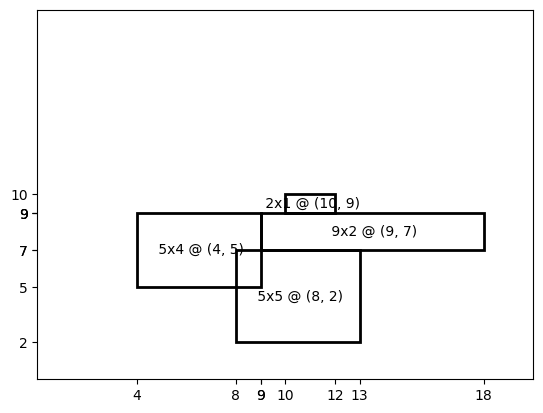

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# draw the rectangle in a canvas
def draw_rectangle(ax, x, y, width, height, color='black', lw=2, fill=False, text=None):
    ax.add_patch(plt.Rectangle((x, y), width, height, fill=fill, facecolor=color, lw=2))
    if text:
        ax.text(x + width / 2, y + height / 2, text, ha='center', va='center')

# draw the stock in a canvas
def draw_stock(ax, stock):
    draw_rectangle(ax, stock.x, stock.y, stock.width, stock.height, text=str(stock).split(':')[-1])


random = np.random.RandomState(409)
stocks = [Stock(*random.randint(10, size=4)+1) for i in range(4)]

fig, ax = plt.subplots()
for stock in stocks:
    print(stock)
    draw_stock(ax, stock)

ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
# ax.axis('equal')
# hide the axis ticks just by setting the ticks to an empty list ax.set_xticks([])
ax.set_xticks([stock.x for stock in stocks] + [stock.x + stock.width for stock in stocks])
ax.set_yticks([stock.y for stock in stocks] + [stock.y + stock.height for stock in stocks])
plt.show()


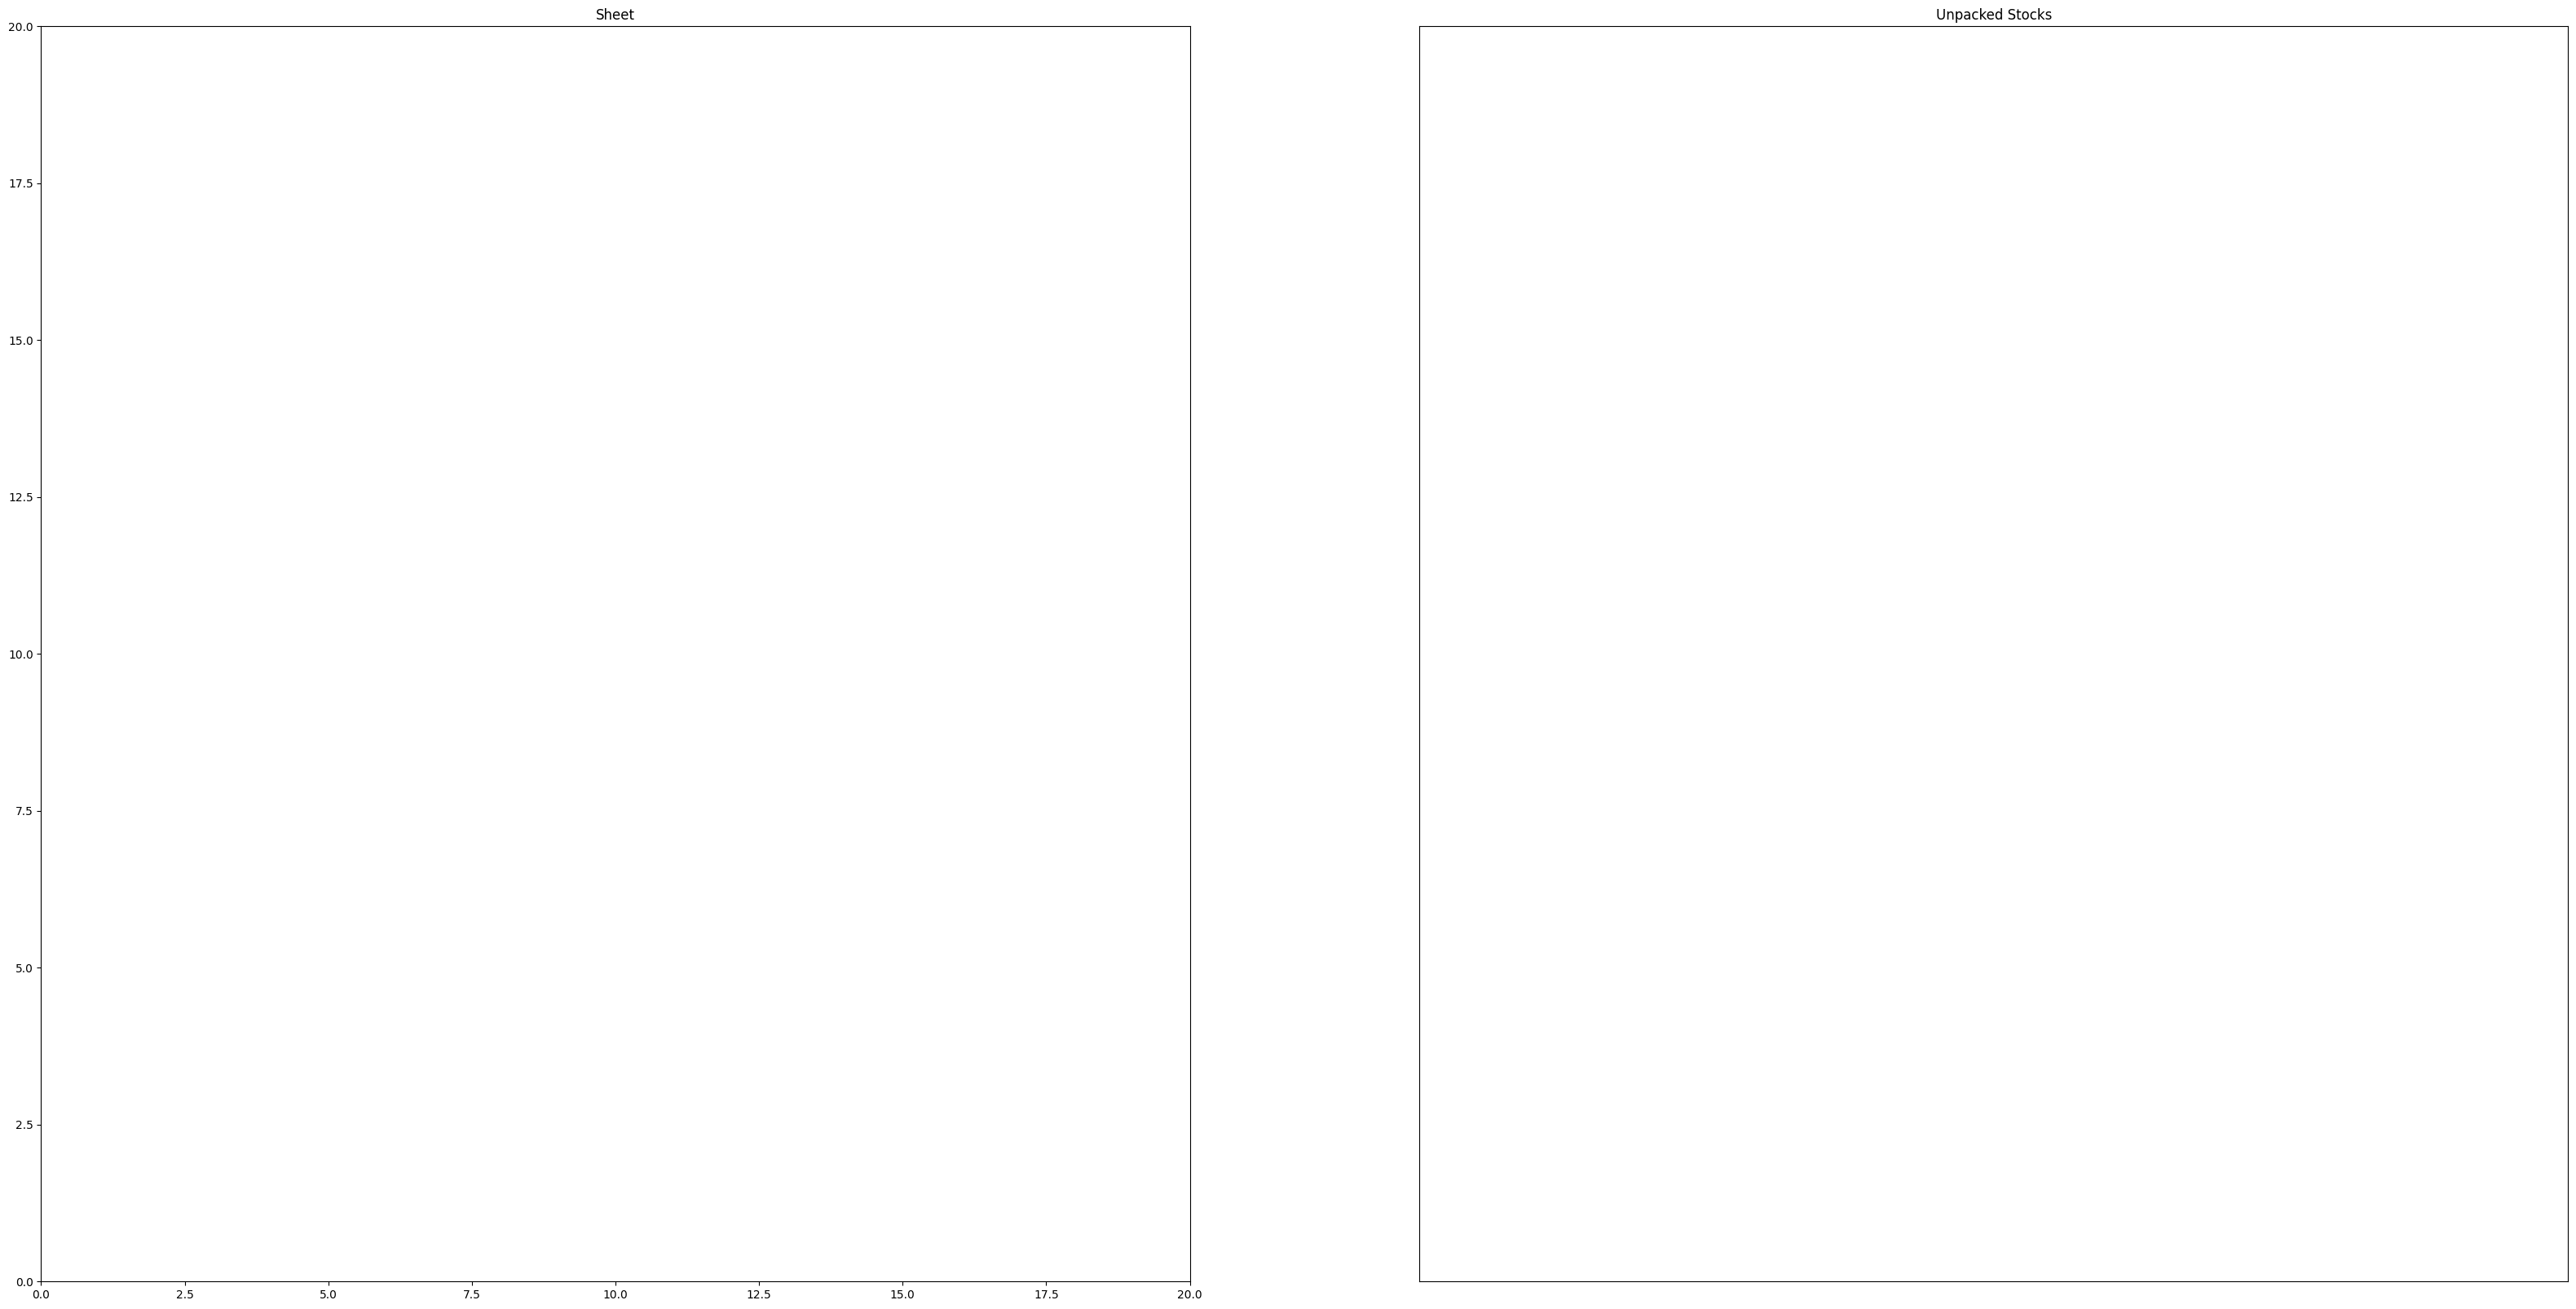

In [3]:
from visualization import VisualSheet
from stock import Stock, Sheet

stocks = [
    Stock(5, 2),
    Stock(3, 5),
    Stock(4, 3),
    Stock(3, 3),
    Stock(8, 5),
    Stock(5, 5),
    Stock(3, 3),
    Stock(3, 6),
]

sheet = Sheet(20, 20, stocks=stocks)

visual_sheet = VisualSheet(sheet)
# visual_sheet.draw(unpacked=True)

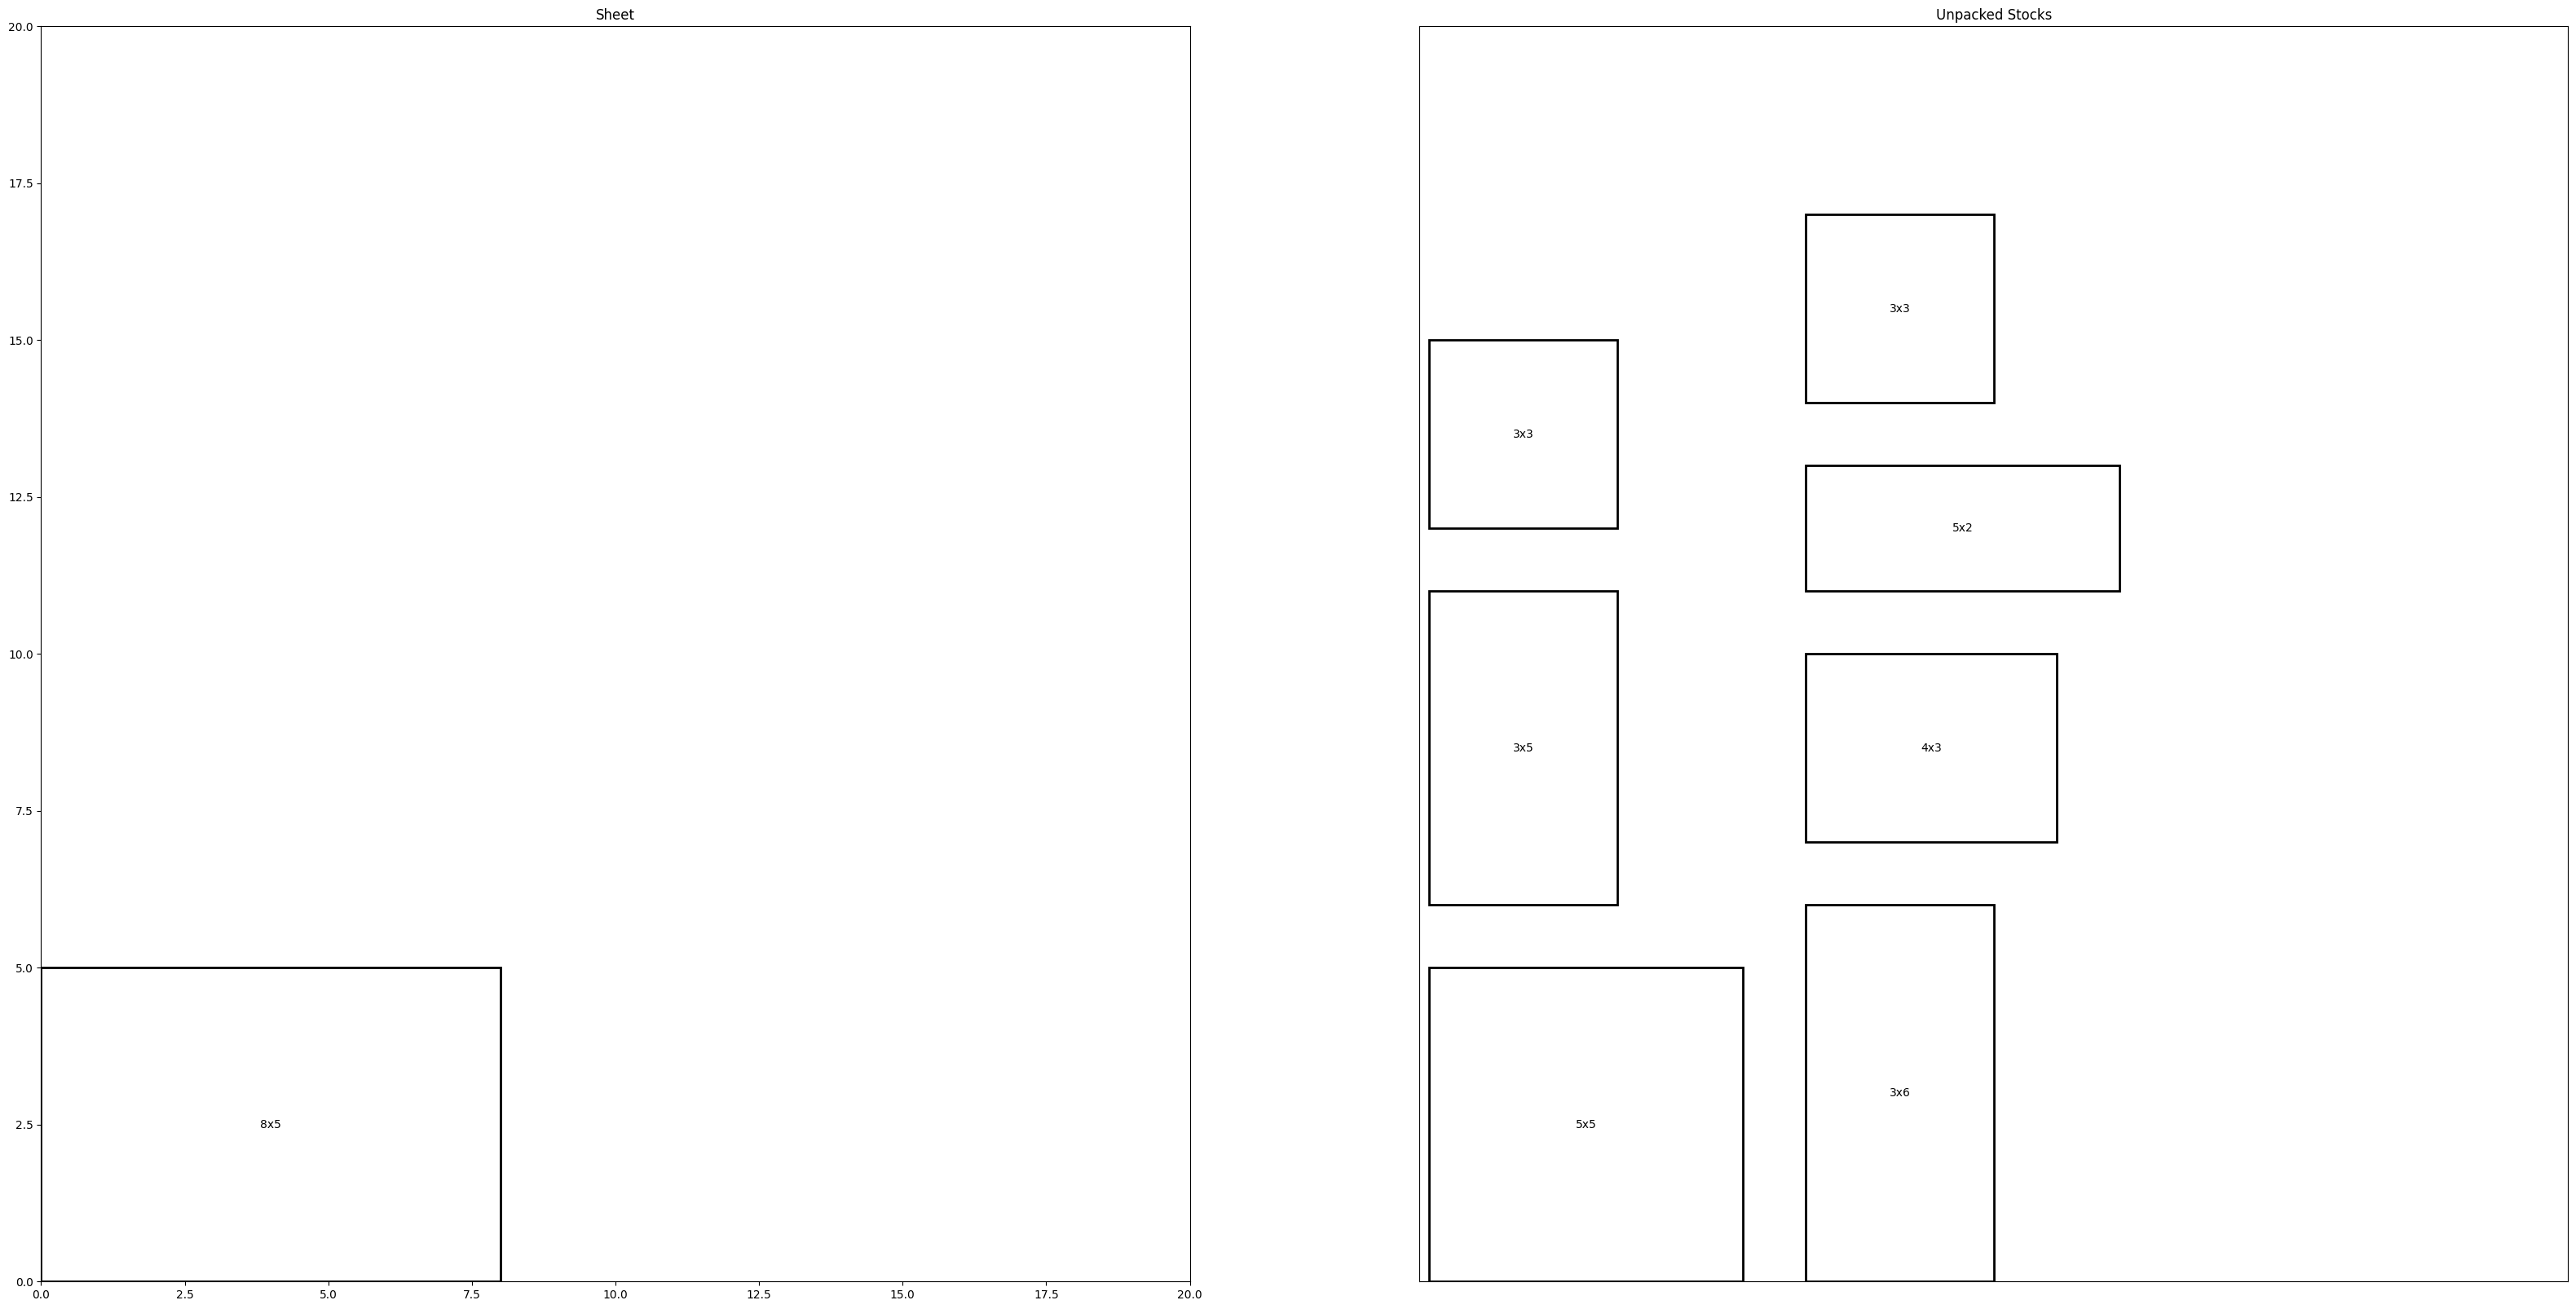

In [4]:
sheet.pack(sheet.unpacked_stocks[0], (0, 0))
VisualSheet(sheet).draw(unpacked=True)

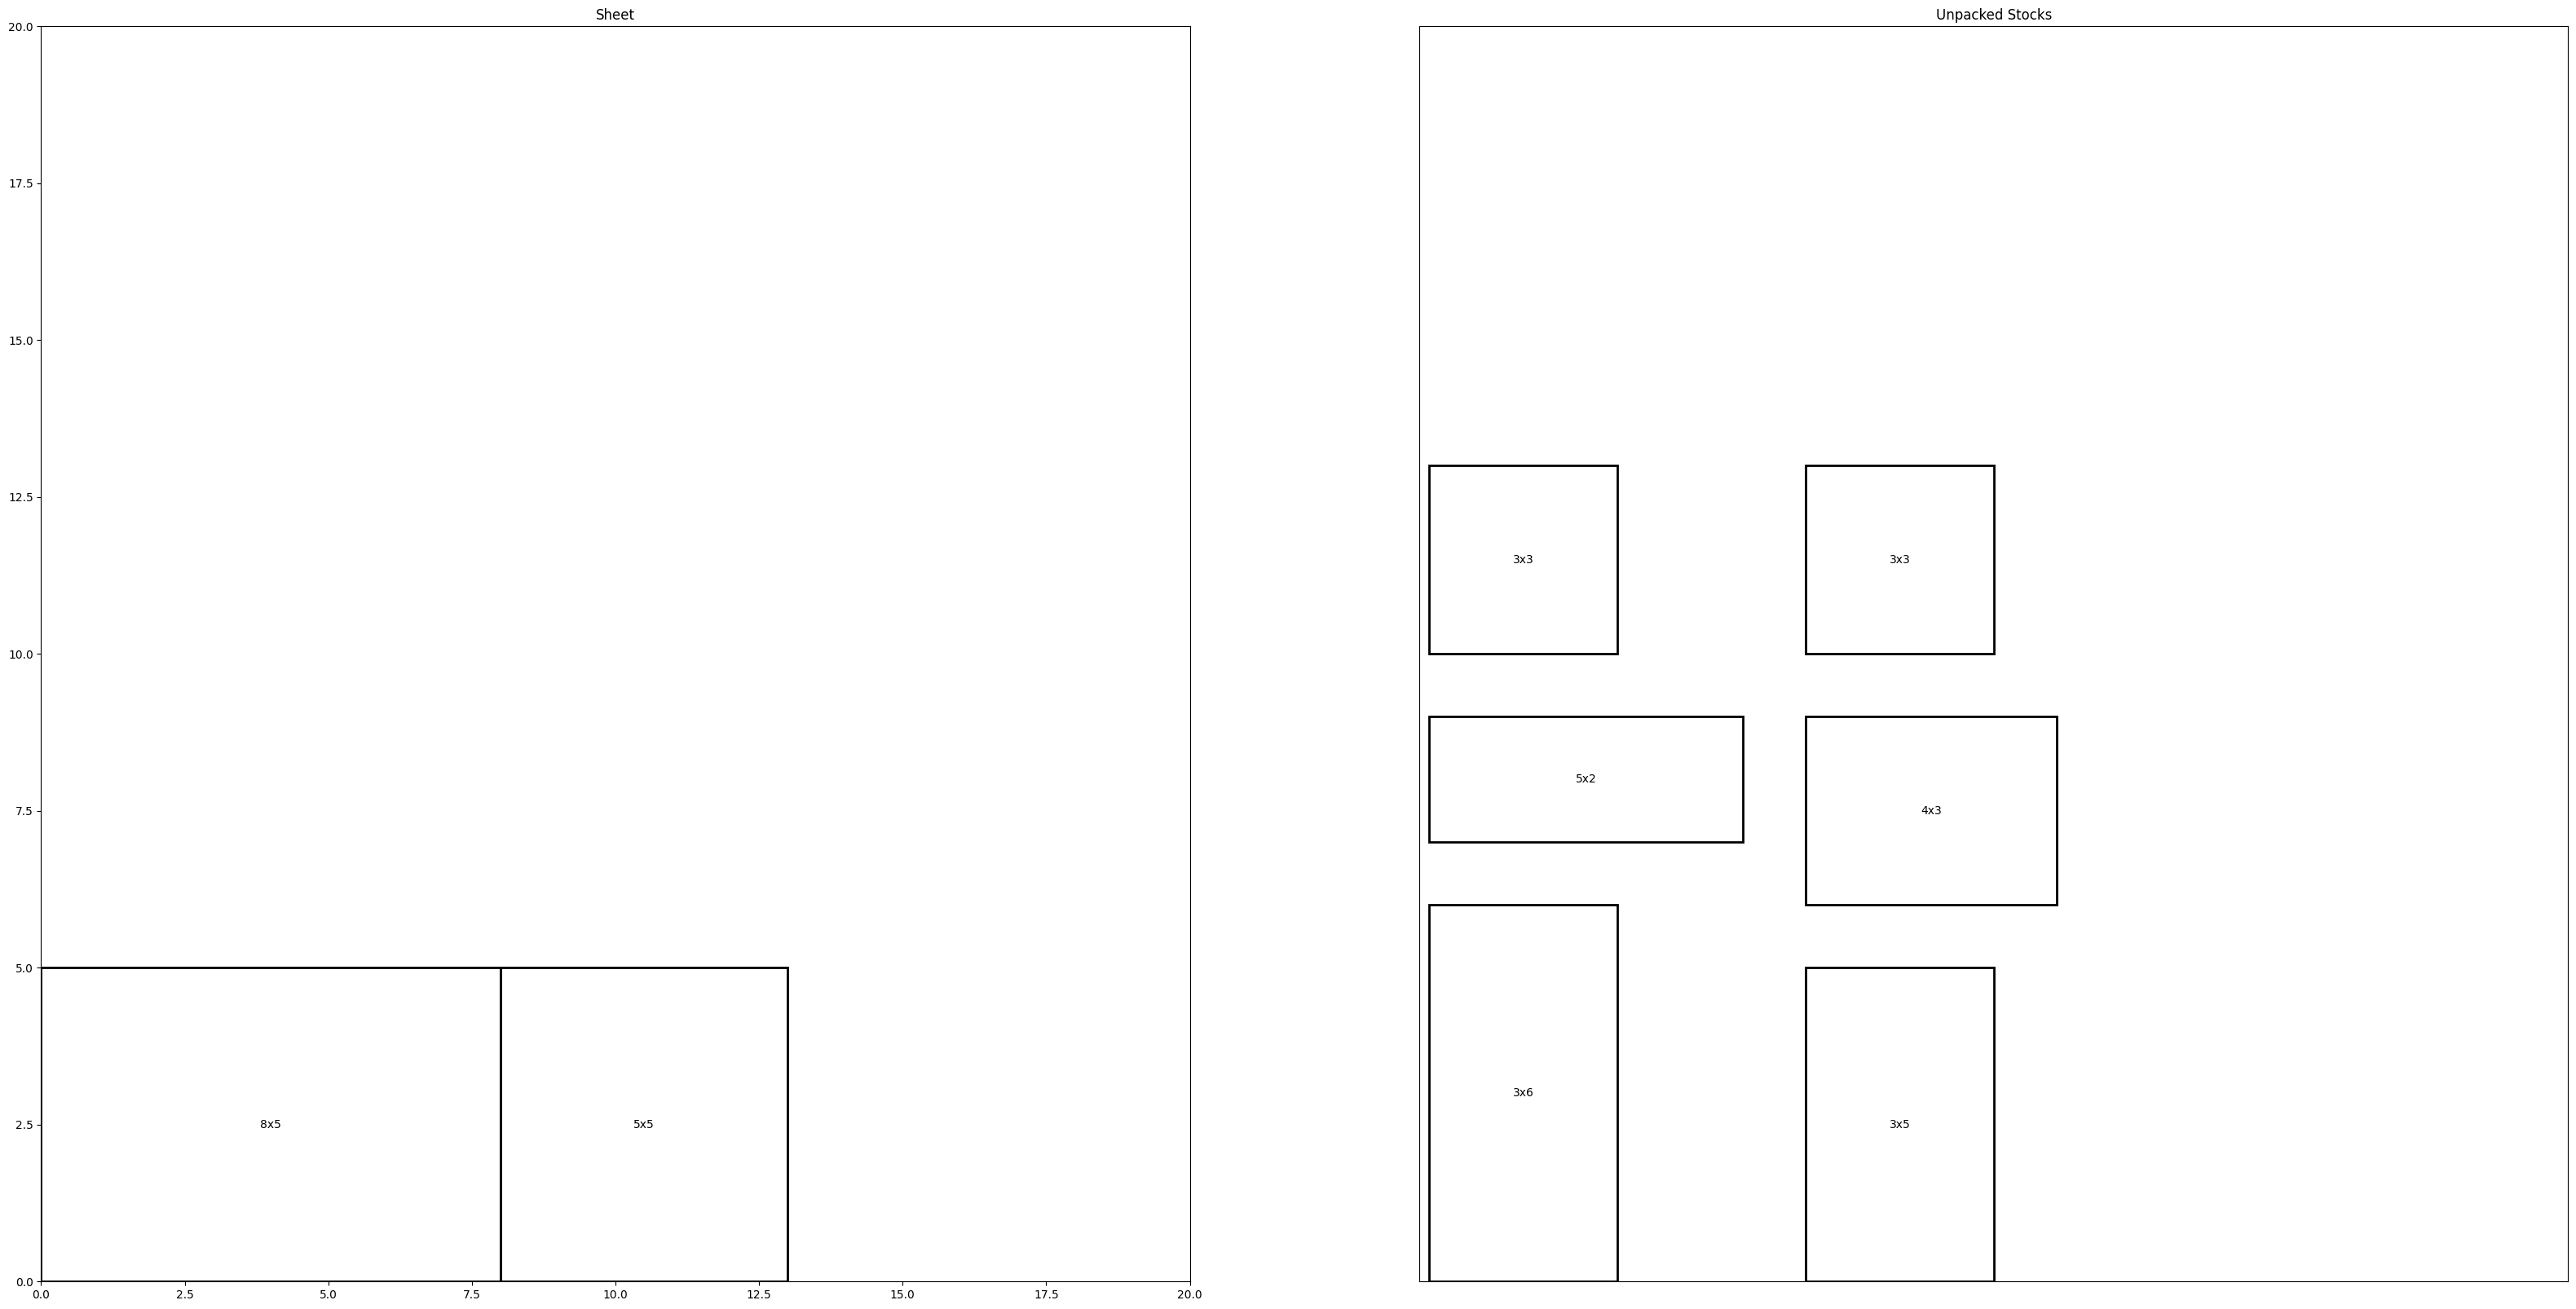

In [5]:
sheet.pack(sheet.unpacked_stocks[0], (8, 0))
VisualSheet(sheet).draw(unpacked=True)

### New Idea

Instead of implementing a semi-packing process (staggred grid layout to display the unpacked stocks), what if there's one simple row of the unpacked items, and it's scrollable horizontally? This way, there's no need to worry about showing the unpacked items in an space-efficient way.

The cell below is a simple demonstration of the idea. [The Stackoverflow answer](https://stackoverflow.com/a/31002878/11918305)

Additionally, there's no need for the Slider widget. The matplotlib interactive plot can be used to zoom in and out and scroll with hand.

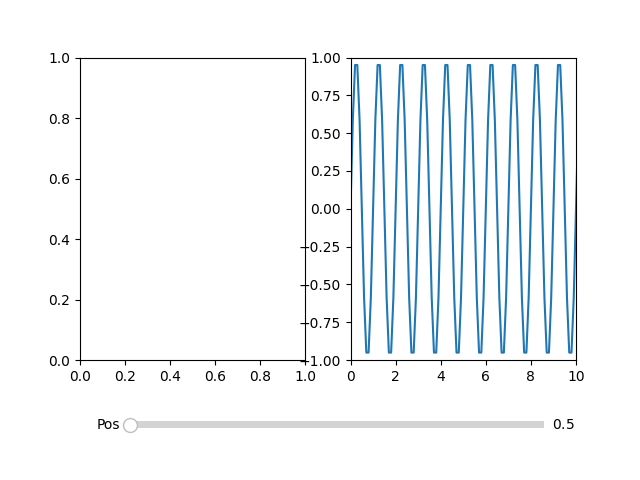

In [7]:
from matplotlib.widgets import Slider
%matplotlib widget

fig, ax = plt.subplots(1,2)
ax2 = ax[1]
plt.subplots_adjust(bottom=0.25)

t = np.arange(0.0, 100.0, 0.1)
s = np.sin(2*np.pi*t)
l, = plt.plot(t,s)
plt.axis([0, 10, -1, 1])

axcolor = 'lightgoldenrodyellow'
axpos = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor=axcolor)

spos = Slider(axpos, 'Pos', 0.1, 90.0)

def update(val):
    pos = spos.val
    ax2.axis([pos,pos+10,-1,1])
    fig.canvas.draw_idle()

spos.on_changed(update)

plt.show()